# 444 Final Project



## Importing and Inspecting the Data

In [53]:
# prompt: Read in a dataset called student_depression_dataset.csv and inspect the first few rows.

import pandas as pd

# Load the dataset
try:
  df = pd.read_csv('student_depression_dataset.csv')
except FileNotFoundError:
  print("Error: 'student_depression_dataset.csv' not found. Please upload the file to your current working directory or provide the correct path.")
except Exception as e:
  print(f"An error occurred: {e}")
else:
  # Inspect the first few rows
  print(df.head())


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [54]:
# How many records have each value of 'Work Pressure'
print(df['Work Pressure'].value_counts())

# Remove column, as it seems to be erroneously entered/ not consistently asked.
df = df.drop(columns=['Work Pressure'])

# Remove rows with ?
mask = df.applymap(lambda x: x == '?')
df = df[~mask.any(axis=1)]


Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64


C:\Users\nicks\AppData\Local\Temp\ipykernel_19528\1444725370.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: x == '?')


In [55]:
# Check for nulls
print(df.isnull().sum())
# Print number of records
print(len(df))
# Print the feature names
print(df.columns)
# Print the unique values of the categorical variables
# List of categorical columns
categorical_columns = ['Gender', 'City', 'Profession', 'Degree', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?']

# Print unique values for each categorical column
for column in categorical_columns:
    print(f"Unique values for {column}: {df[column].unique()}")

# Print the type of each variable
print(df.dtypes)


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
27898
Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours',

In [56]:
# Make the family history binary
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0)
# Make the suicidal thoughts binary
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x == 'Yes' else 0)

In [57]:
# Strip the double quotation marks from anything if they are there
df = df.apply(lambda x: x.str.strip("'") if x.dtype == "object" else x)

In [58]:
# Remove the incorrect city name records.
# Define the list of valid cities
valid_cities = ['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur', 'Pune',
                'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara', 'Kalyan', 'Rajkot',
                'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow', 'Indore', 'Surat', 'Ludhiana',
                'Bhopal', 'Meerut', 'Agra', 'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur',
                'Patna', 'Faridabad', 'Delhi']

# Filter the DataFrame to keep only rows with valid cities
df = df[df['City'].isin(valid_cities)]

# Check the shape after cleaning
print(f'Number of records after removing invalid cities: {df.shape[0]}')
for column in categorical_columns:
    print(f"Unique values for {column}: {df[column].unique()}")

Number of records after removing invalid cities: 27872
Unique values for Gender: ['Male' 'Female']
Unique values for City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi']
Unique values for Profession: ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Unique values for Degree: ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']
Unique values for Sleep Duration: ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Unique values

## Linear Regression Model

### Setup the scaler and encoding


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Features (X) and target (y)
X = df_encoded.drop(columns=['Depression', 'id'])  # Drop 'Depression' as it's the target variable
y = df_encoded['Depression']  # Target variable
df_encoded.head()

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [61]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

# Metrics for Linear Regression

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 3.56689352443728e+23
R² Score: -1.4729532640336882e+24


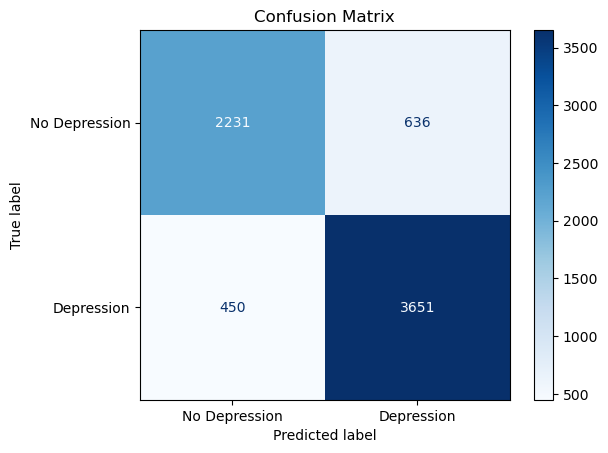

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Convert predicted probabilities to binary values (using a threshold of 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Depression", "Depression"])
cmd.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.8441446613088404
Precision: 0.8516445066480056
Recall: 0.8902706656912948
F1-Score: 0.8705293276108726


In [65]:
# Feature importance
# Get the feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Assuming X is a DataFrame
    'Coefficient': model.coef_
})

# Sort by absolute value of coefficients to see which features matter most
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance)

                                    Feature   Coefficient  Abs_Coefficient
43        Profession_Educational Consultant  2.538400e+11     2.538400e+11
47                    Profession_Pharmacist  1.233242e+11     1.233242e+11
46                       Profession_Manager -9.759599e+10     9.759599e+10
85  Have you ever had suicidal thoughts ?_1  1.834064e-01     1.834064e-01
1                         Academic Pressure  1.511700e-01     1.511700e-01
..                                      ...           ...              ...
81                    Sleep Duration_Others -3.313464e-04     3.313464e-04
38                          Profession_Chef -2.168115e-04     2.168115e-04
69                               Degree_MBA -1.495273e-04     1.495273e-04
66                           Degree_M.Pharm -9.031887e-05     9.031887e-05
50                Profession_UX/UI Designer -1.405515e-05     1.405515e-05

[86 rows x 3 columns]


## Decision Tree Model

### Setup 


In [66]:

# Import required libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import pandas as pd

# Features (X) and target (y)
X = df_encoded.drop(columns=['Depression', 'id', "Have you ever had suicidal thoughts ?_1"])
y = df_encoded['Depression']

# Split the data into training and test sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the Decision Tree model
dt_model.fit(X_train_dt, y_train_dt)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_dt)

# Metrics for Decision Tree Model

In [67]:
# Evaluate model performance
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
precision_dt = precision_score(y_test_dt, y_pred_dt)
recall_dt = recall_score(y_test_dt, y_pred_dt)
f1_dt = f1_score(y_test_dt, y_pred_dt)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}\n")

Decision Tree Performance:
Accuracy: 0.7659299655568312
Precision: 0.7797915722700498
Recall: 0.8393074859790295
F1 Score: 0.8084556664709337



## Visualization of Decision Tree Model Results

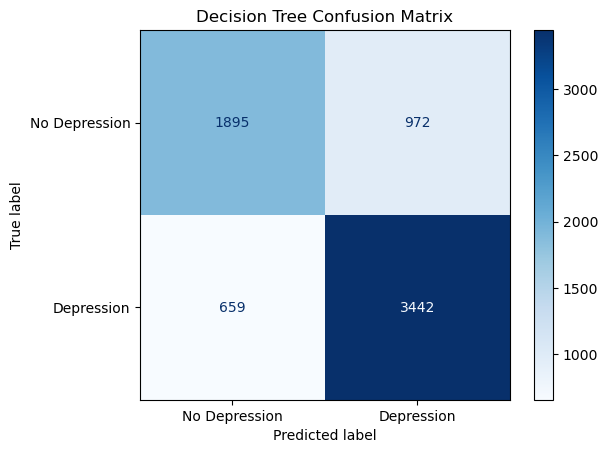

Decision Tree Feature Importance:
                     Feature  Importance
1          Academic Pressure    0.719100
6           Financial Stress    0.259988
84  Dietary Habits_Unhealthy    0.020912
82   Dietary Habits_Moderate    0.000000
81     Sleep Duration_Others    0.000000
..                       ...         ...
27               City_Nashik    0.000000
26               City_Nagpur    0.000000
25               City_Mumbai    0.000000
24               City_Meerut    0.000000
42         Profession_Doctor    0.000000

[85 rows x 2 columns]


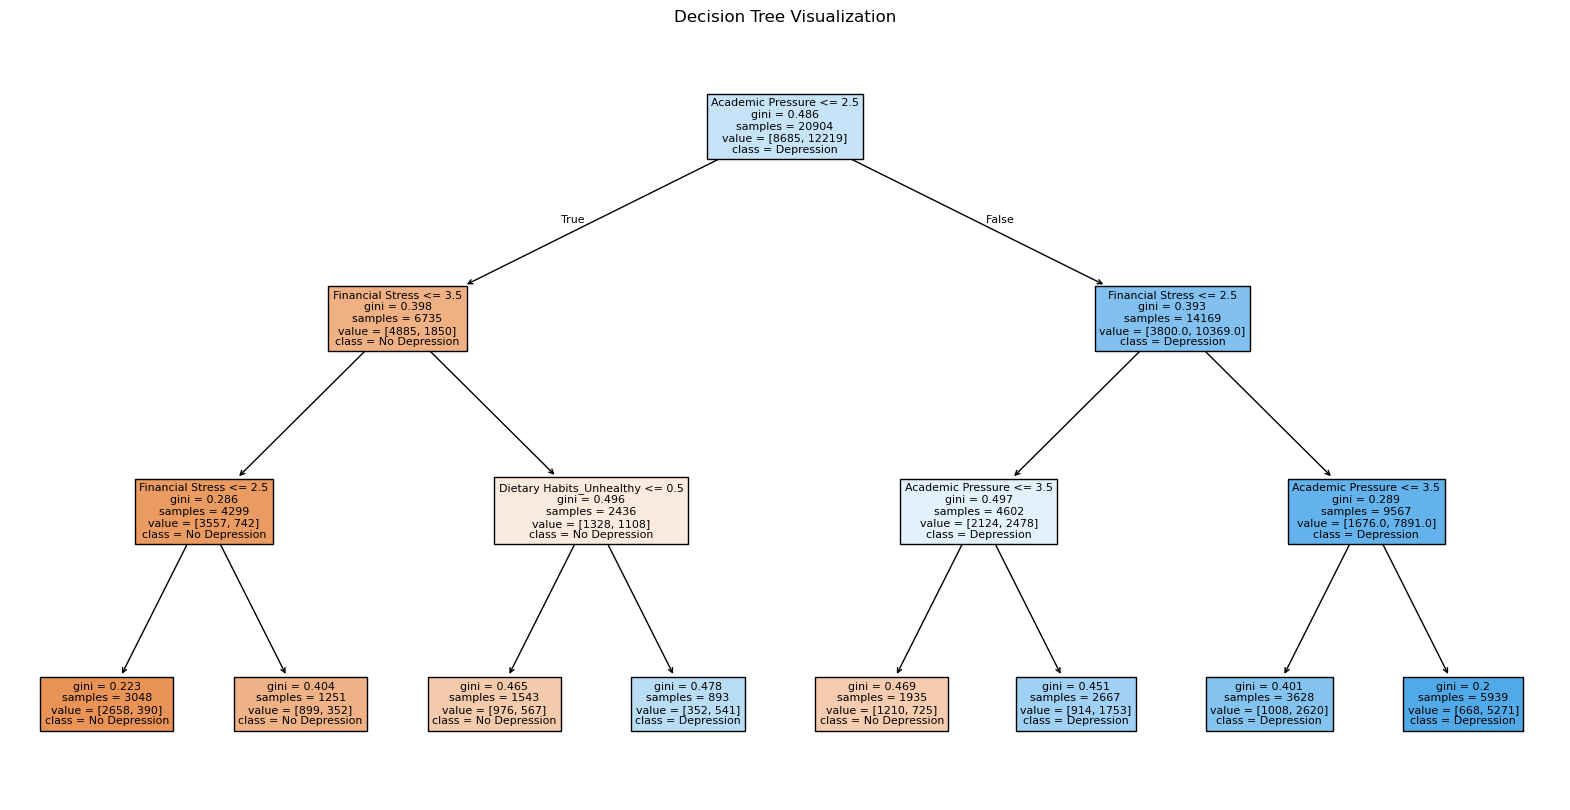

In [68]:
# Plot the confusion matrix
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)
cmd_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, 
                                display_labels=["No Depression", "Depression"])
cmd_dt.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Feature Importance
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Decision Tree Feature Importance:")
print(feature_importance_dt)

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Depression", "Depression"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## Gradient Boosting Machines

### Setup

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=42)

gbm_model.fit(X_train_dt, y_train_dt)

y_pred_gbm = gbm_model.predict(X_test_dt)

### Metrics

In [70]:
# Evaluate model performance
accuracy_gbm = accuracy_score(y_test_dt, y_pred_gbm)
precision_gbm = precision_score(y_test_dt, y_pred_gbm)
recall_gbm = recall_score(y_test_dt, y_pred_gbm)
f1_gbm = f1_score(y_test_dt, y_pred_gbm)

print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_gbm}")
print(f"Precision: {precision_gbm}")
print(f"Recall: {recall_gbm}")
print(f"F1 Score: {f1_gbm}\n")

Gradient Boosting Performance:
Accuracy: 0.7972158438576349
Precision: 0.8092498849516797
Recall: 0.8575957083638137
F1 Score: 0.8327216763347934



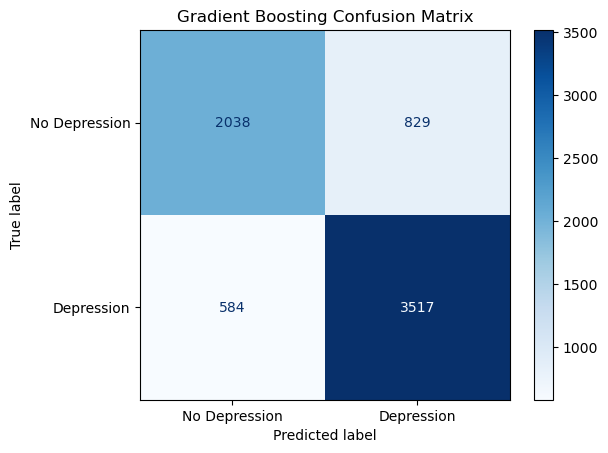

Gradient Boosting Feature Importance:
                     Feature  Importance
1          Academic Pressure    0.517916
6           Financial Stress    0.213803
0                        Age    0.098770
5           Work/Study Hours    0.062064
84  Dietary Habits_Unhealthy    0.039941
..                       ...         ...
51              Degree_B.Com    0.000000
52               Degree_B.Ed    0.000000
54             Degree_B.Tech    0.000000
56                Degree_BBA    0.000000
42         Profession_Doctor    0.000000

[85 rows x 2 columns]


In [ ]:
cm_gbm = confusion_matrix(y_test_dt, y_pred_gbm)
cm_gbm = ConfusionMatrixDisplay(confusion_matrix=cm_gbm, display_labels=["No Depression", "Depression"])

cm_gbm.plot(cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

feature_importance_gbm = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Gradient Boosting Feature Importance:")
print(feature_importance_gbm)